### Import

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import multivariate_normal as mnormal
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### Create Clusters and sample them to generate data

In [3]:
base_mu1 = np.array([+1.5, -1.5])
base_mu2 = np.array([-1.5, +1.5])
base_sigma1 = np.array([[2.0, 0.3], [0.3, 0.5]])
base_sigma2 = np.array([[1.0, 0.3], [0.3, 1.0]])
rv1 = mnormal(base_mu1,base_sigma1)
rv2 = mnormal(base_mu2,base_sigma2)
x1 = rv1.rvs(1000)
x2 = rv2.rvs(1000)
X = np.vstack((x1,x2))
labels = np.hstack((np.zeros(1000),np.ones(1000)))

### DBSCAN

In [4]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
y_pred = db.labels_
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
no_noise = list(labels).count(-1)
unique_labels = set(y_pred)

### Plot

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.881
Completeness: 0.610
V-measure: 0.721
Adjusted Rand Index: 0.773
Adjusted Mutual Information: 0.721
Silhouette Coefficient: 0.340


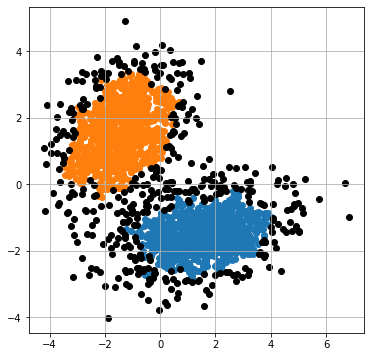

In [6]:
plt.figure(figsize=(6,6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.grid()
for k, col in zip(unique_labels, colors):
    
    #Clusters 
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1])
    
    #Noise Points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1],c='k')
plt.savefig('../../assets/figures/dbscan.png');
print("Estimated number of clusters: %d" % no_clusters)
print("Estimated number of noise points: %d" % no_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, y_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels, y_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, y_pred))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels, y_pred))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels, y_pred))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_pred))    